In [1]:
import os
import sys
sys.path.append('..')
from datetime import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot as plt
from src.support_function import *

In [2]:
root_1 = '../Dataset'
df_test = pd.read_csv(os.path.join(root_1, '3bs_8q_4p_test_resid.csv'),
                parse_dates=['datetime'])
df_train = pd.read_csv(os.path.join(root_1, '3bs_8q_4p_train_resid.csv'),
                parse_dates=['datetime'])
# Column names for all sensors
columns = ['q'+str(i) for i in range(1,12)] + ['p'+str(j) for j in range(1,8)]
target = 'q8'

## SVR train

In [8]:
# hyperparameters
# hist_lag =2 # mae 0.04993831516226736 mse 0.0055847336700298785
hist_lag = 8 # mae 0.049092738714155044 mse 0.005464864353217603
# hist_lag = 8 # mae 0.04890836960889749 mse 0.0054660932499329
# hist_lag = 16 # mae 0.0491472363363604 mse 0.005499391824305064
future_lag = 4

x_train_list = []
y1_train_list = []
y2_train_list = []
y3_train_list = []
y4_train_list = []
x_train = df_train[columns].values
y_train = df_train[target].values
for i in tqdm(range(0, x_train.shape[0]-hist_lag-future_lag)):
    x_train_list += [x_train[i:i+hist_lag,:].reshape(-1)]
    y1_train_list += [y_train[i+hist_lag]]
    y2_train_list += [y_train[i+hist_lag+1]]
    y3_train_list += [y_train[i+hist_lag+2]]
    y4_train_list += [y_train[i+hist_lag+3]]

100%|████████████████████████████████████████████████████████████████████████| 23184/23184 [00:00<00:00, 276630.91it/s]


In [29]:
a = np.random.randint(0,10,(3,4))
b = a.copy()

In [30]:
a.reshape(-1)

array([1, 1, 8, 8, 6, 4, 2, 8, 7, 9, 5, 4])

In [17]:
b.reshape(1,-1)
48*7

336

In [19]:
def fit():
    model1.fit(np.array(x_train_list),np.array(y1_train_list))
    model2.fit(np.array(x_train_list),np.array(y2_train_list))
    model3.fit(np.array(x_train_list),np.array(y3_train_list))
    model4.fit(np.array(x_train_list),np.array(y4_train_list))

(23184, 144)

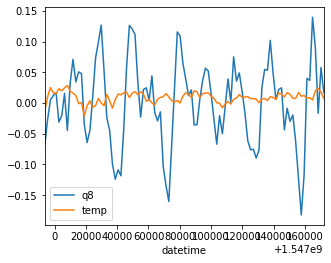

mae 0.048770115432829074 mse 0.005458230105617925
0.003


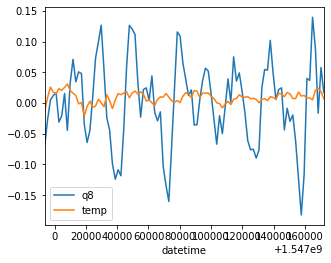

mae 0.04877389090075983 mse 0.005457860099971743
0.01


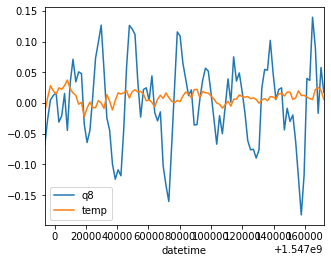

mae 0.048796686392985233 mse 0.0054584146640533114
0.03


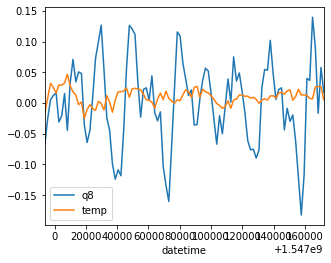

mae 0.04885068003981293 mse 0.005460789836786372
0.09


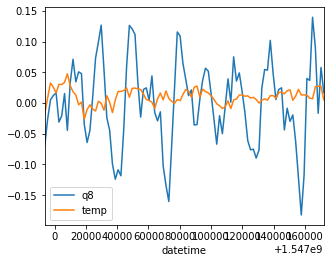

mae 0.04885468104485685 mse 0.0054605024681530275
0.1


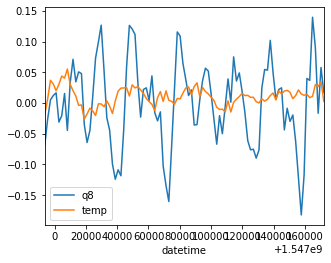

mae 0.048867226212509024 mse 0.0054570919537716405
0.3


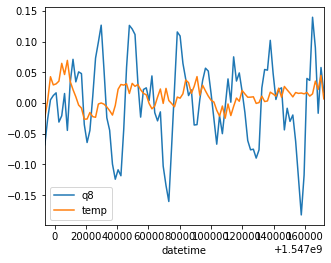

mae 0.04899527069911329 mse 0.005468013328644226
1


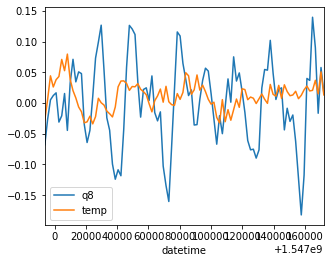

mae 0.049207218337923624 mse 0.005497904149139771
3


In [15]:
for C in [0.003, 0.01, 0.03, 0.09, 0.1, 0.3, 1,3]:
    model1 = SVR(degree=4,
                tol=1e-4,
                C=0.01,
                gamma='auto')
    model2 = SVR(degree=4,
                tol=1e-4,
                C=0.1,
                gamma='auto')
    model3 = SVR(degree=4,
                tol=1e-4,
                C=0.03,
                gamma='auto')
    model4 = SVR(degree=4,
                tol=1e-4,
                C=0.01,
                gamma='auto')
    
    fit()
    test()
    print(C)
    

# model1 = GradientBoostingRegressor(
#     learning_rate=0.01,
#     n_estimators=100
# )
# model2 = GradientBoostingRegressor(
# learning_rate=0.01,
# n_estimators=100
# )
# model3 = GradientBoostingRegressor(
# learning_rate=0.01,
# n_estimators=100
# )
# model4 = GradientBoostingRegressor(
# learning_rate=0.01,
# n_estimators=100
# )

## SVR test

In [14]:
# hist_lag = 8
# future_lag = 4

def fit():
    model1.fit(np.array(x_train_list),np.array(y1_train_list))
    model2.fit(np.array(x_train_list),np.array(y2_train_list))
    model3.fit(np.array(x_train_list),np.array(y3_train_list))
    model4.fit(np.array(x_train_list),np.array(y4_train_list))

def plot_series(df_list, start, end):
    length = df_list[0].iloc[start: end].shape[0]
    plt.figure(figsize=(int(length/20),4), 
               facecolor='w')
    for i in df_list:
        i.iloc[start: end].plot()
    plt.legend([i.name for i in df_list])
    plt.show()

def test():
    timestamp_list = []
    resid_pred_list = []
    x_test_list = []
    y1_test_list = []
    y2_test_list = []
    y3_test_list = []
    y4_test_list = []
    x_test = df_test[columns].values
    y_test = df_test[target].values
    for i in range(0, df_test.shape[0]-hist_lag-future_lag):
        forecast_input = x_train[i:i+hist_lag,:].reshape(1,-1)
        foreca1 = model1.predict(forecast_input)
        foreca2 = model2.predict(forecast_input)
        foreca3 = model3.predict(forecast_input)
        foreca4 = model4.predict(forecast_input)

        forecast_timestamp = datetime.timestamp(df_test['datetime'].iloc[i+hist_lag])
    #     forecast_output = pd.DataFrame(model_fitted.forecast(y=forecast_input, steps=future_lag),
    #                                    columns=columns)
        timestamp_list += [forecast_timestamp]
        resid_pred_list += [[float(foreca1), float(foreca2), float(foreca3), float(foreca4)]]
        
    df1 = pd.read_csv(os.path.join('../Dataset', '3bs_8q_4p_test_resid.csv'),
                     parse_dates=['datetime'])
    df1.index = df1['datetime'].apply(datetime.timestamp)
    resid_columns = ['resi1', 'resi2', 'resi3', 'resi4']
    df2 = pd.DataFrame(np.array(resid_pred_list), index=np.array(timestamp_list), columns=resid_columns)
    df3 = df1.join(df2)
    start = 200
    end = -200
    df3['temp'] = 0
    df3['0'] = 0
    mean_mse = 0
    mean_mae = 0
    for index, i in enumerate(resid_columns):
        # 方法一：ori 与 ori 比较
        df3['temp'] += df3[i].copy()
        # 方法三：resid 与 resid 比较
        pred = (df3['temp']).shift(index).iloc[start:end]
        true = df3[target].rolling(index+1).sum().iloc[start:end]
        eval_dict = eval_metrics(true.values, pred.values)
#         print(eval_dict)
        mean_mae += eval_dict['MAE']/4
        mean_mse += eval_dict['MSE']/4

        if index == 3:
            plot_series([true, pred], start, start+100)
    print('mae', mean_mae, 'mse', mean_mse)

#     print()
#     print(eval_metrics(df3['resi1'].shift(0).iloc[start:end].values, df3[target].iloc[start:end].values))
#     print(eval_metrics(df3['resi2'].shift(1).iloc[start:end].values, df3[target].iloc[start:end].values))
#     print(eval_metrics(df3['resi4'].shift(3).iloc[start:end].values, df3[target].iloc[start:end].values))
#     print(eval_metrics(df3['0'].iloc[start:end].values, df3[target].iloc[start:end].values))


{'MAE': 0.02914621058215223, 'MSE': 0.0016263529225910044, 'MAPE': -0.33208045562328564}


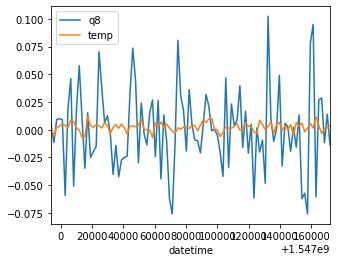

{'MAE': 0.04343537705026643, 'MSE': 0.0038857029994927425, 'MAPE': -2.9927648666011613}
{'MAE': 0.05740815984481909, 'MSE': 0.006844583305540156, 'MAPE': 0.8668707836577899}
{'MAE': 0.06792915612394215, 'MSE': 0.009794915881837164, 'MAPE': -2.249909797170492}
mae 0.04947972590029497 mse 0.005537888777365267

{'MAE': 0.02914621058215223, 'MSE': 0.001626352922591004, 'MAPE': 20.063384661234988}
{'MAE': 0.02922777740539702, 'MSE': 0.0016319297919446247, 'MAPE': -2.3528847141070512}
{'MAE': 0.02924490682872176, 'MSE': 0.0016298575819653181, 'MAPE': 16.681707380875253}


..\src\support_function.py:23: RuntimeWarning: divide by zero encountered in true_divide
  metrics_dict['MAPE'] = np.mean(np.true_divide(np.abs(y_true-y_pred), y_true))


{'MAE': 0.029059011149574113, 'MSE': 0.00162114407484534, 'MAPE': inf}


In [63]:

    
    
# def reconstruct(timestamp_list, resid_pred_list):
# import pdb

# plot_series([df3[target+'_ori'], df3['pre_resi1'], df3['pre_resi4']], start, end)


# # SVR
# {'MAE': 0.02899451878196307, 'MSE': 0.0016094267976891092, 'MAPE': -0.7858130656117951}
# {'MAE': 0.04280903066313286, 'MSE': 0.0038174105569514214, 'MAPE': 11.584518968942579}
# {'MAE': 0.056541736810397, 'MSE': 0.006734736363489834, 'MAPE': 2.8393572732818244}
# {'MAE': 0.06728731780641245, 'MSE': 0.00970205866122248, 'MAPE': 9.514088981074432}
# mae 0.04890826247490203 mse 0.005465919113756197

# GBRT
# {'MAE': 0.029366805385426038, 'MSE': 0.0016401188569943345, 'MAPE': 1.0586732185527652}
# {'MAE': 0.04334074063558702, 'MSE': 0.0038892566382282886, 'MAPE': -6.919176402462716}
# {'MAE': 0.05659218286425061, 'MSE': 0.006786174450891199, 'MAPE': -24.767495412073295}
# {'MAE': 0.06674436312946141, 'MSE': 0.009695044774124119, 'MAPE': 57.27113750485794}
# mae 0.04901102300368127 mse 0.005502648680059485